In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/011.askja/results/deseq2/DESeq2_TPM_values.human.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39400, 12)


,HRH88_CTRL1A,HRH88_CTRL2A,HRH88_CTRL3A,HRH88_60DHA1A,HRH88_60DHA2A,HRH88_60DHA3A,HRH88_120DHA1A,HRH88_120DHA2A,HRH88_120DHA3A,HRH88_240DHA1A,HRH88_240DHA2A,HRH88_240DHA3A
ENSG00000000003,32.114443,34.097134,35.352294,20.761164,23.287722,25.570191,19.471262,18.717180,21.686797,20.211079,20.244839,25.026474
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,108.673899,110.622198,118.851795,91.801502,93.735878,111.950251,113.263012,116.737185,130.261905,130.996464,127.943973,139.505826
ENSG00000000457,2.970358,3.504123,3.535322,3.012590,3.127707,3.648064,3.992530,4.010315,3.349917,3.479031,5.002712,3.848078
ENSG00000000460,10.264440,11.941254,15.486486,12.575293,13.842605,18.475780,17.808775,20.167137,20.930178,20.206310,24.077970,18.948895
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.000000,0.024468,0.017195,0.000000,0.000000,0.020857,0.243791,0.000000,0.000000,0.019551,0.000000,0.000000
ENSG00000293550,0.391504,0.286236,0.316079,0.622795,0.507104,0.338455,0.907334,0.811193,0.575031,0.665318,0.918653,0.582870
ENSG00000293553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. filter and transform

In [6]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(13631, 12)
(2068, 12)


In [7]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [8]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.53506707 0.16129373]


In [9]:
my_colors = ['black']*3 + ['skyblue']*3 + ['gold']*3 + ['tab:red']*3
my_markers = ['o']*12

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='white', markersize=20, alpha=2/3)
    
]

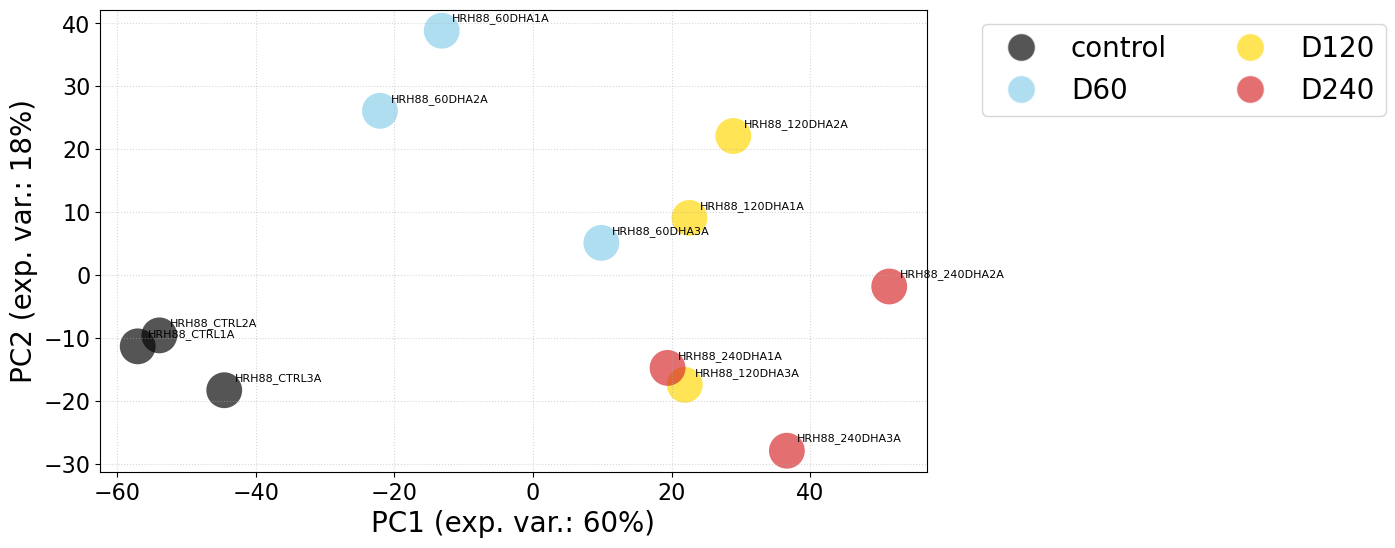

In [17]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

    epsilon = 1.5
    matplotlib.pyplot.text(new[i,0]+epsilon, new[i,1]+epsilon, expression.columns[i], size=8)

matplotlib.pyplot.legend(legend_elements, ['control', 'D60', 'D120', 'D240'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

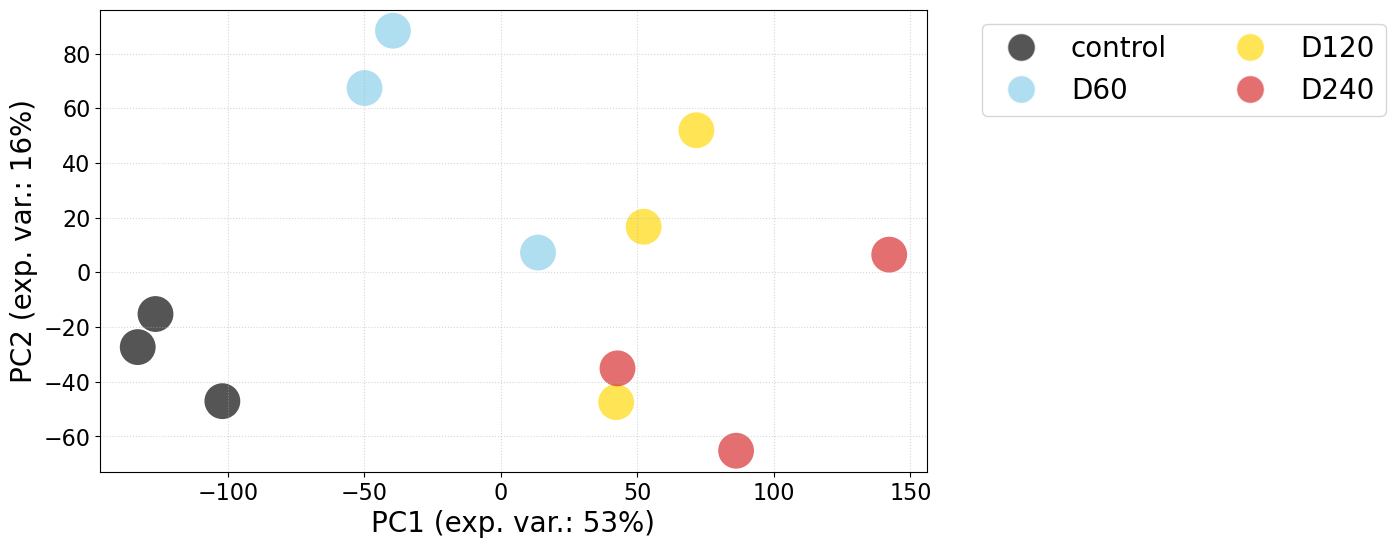

In [11]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

matplotlib.pyplot.legend(legend_elements, ['control', 'D60', 'D120', 'D240'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

# 4. visualize high expression

In [12]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.60766936 0.18709881]


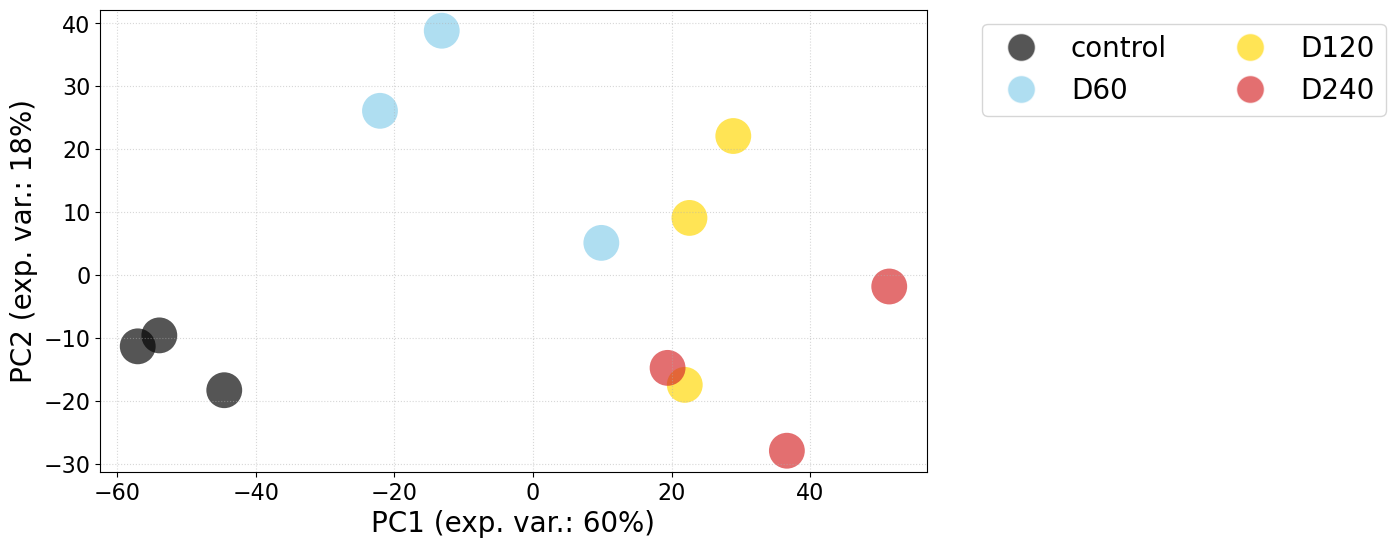

In [13]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')
    
matplotlib.pyplot.legend(legend_elements, ['control', 'D60', 'D120', 'D240'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()